<a href="https://colab.research.google.com/github/RZDN/Complejidad_Algoritmica_RZD/blob/main/EXF_PREGUNTA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 104 (delta 50), reused 91 (delta 41), pack-reused 0
Receiving objects: 100% (104/104), 15.59 MiB | 21.89 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [13]:
from algorithmic_complexity.aclib.ds import DisjointSet
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
from heapq import heappush as push, heappop as pop

In [134]:

def PRIM(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['cost'] = math.inf
    G.nodes[u]['path'] = -1

  q = [(0, s)]
  while q:
    _, u = pop(q)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          w = G.edges[u, v]['weight']
          if w < G.nodes[v]['cost']:
            G.nodes[v]['cost'] = w
            G.nodes[v]['path'] = u
            push(q, (w, v))

  path = [-1]*G.number_of_nodes()
  for u in G.nodes:
    path[u] = G.nodes[u]['path']

  return path

In [27]:
def KRUSKAL(G):
  n = G.number_of_nodes()
  ds = DisjointSet(n)
  edges = []
  for u, v in G.edges:
    w = G.edges[u, v]['weight']
    push(edges, (w, u, v))

  path = [-1]*n
  while edges and n > 0:
    _, u, v = pop(edges)
    if not ds.isSameSet(u, v):
      ds.union(u, v)
      if path[u] < 0:
        path[u] = v
      else:
        path[v] = u
      n -= 1

  return path

In [16]:
%%file 1.in
0 1 3
1 2 2
1 5 5
2 4 5
2 5 7
3 5 5
3 7 8
4 6 8
4 7 2 
4 3 3

Overwriting 1.in


**PARA EXPLICAR LA DIFERENCIA ENTRE PRIM Y KRUSKAL Usaremos el siguiente Grafo con los siguientes datos de prueba** 



Primero El Algoritmo de PRIM:
Este algirtmo te devuelve el arbol de expansion minima con un nodo de inicio para este caso de prueba seria nodo de inicio = 0;

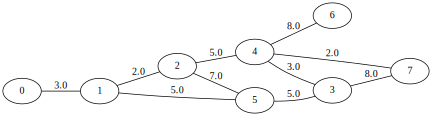

In [23]:
G = nx.read_weighted_edgelist('1.in', nodetype=int)
gs.nx2gv(G, weighted=True)

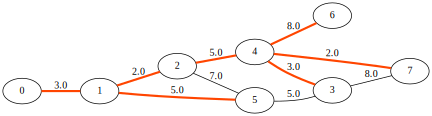

In [25]:

path = PRIM(G, 0)
gs.nx2gv(G, weighted=True, path=path)

SEGUNDO El Algoritmo de KRUSKAL: Este algirtmo te devuelve el arbol de expansion minima mas optima sin nodo inicial.
El Resultado siguiente muestra que El Algoritmo de PRIM Muestra  el mismo arbol que el de KRUSKAl. Esto es porque con el nodo de inicio = 0 para prim coincide con el arbol de expansion minimo que en este caos nos muestra KRUSKAL. pero esto no siempre coincidira, ya que cuando cambiamos el nodo de inicio para el algoritmo de PRIM el arbol de expansion minimo sera diferente.



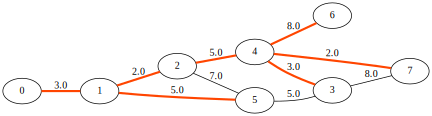

In [28]:
path = KRUSKAL(G)
gs.nx2gv(G, weighted=True, path=path)

En esta comparacion mostramos como los arboles ya no coinciden dado que el nodo inicial para PRIM ya no es 0:

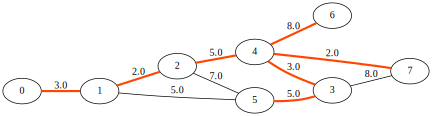

In [30]:
path = PRIM(G,4)
gs.nx2gv(G, weighted=True, path=path)


o con los siguientes nodos de entrada en las cuales los arboles tambien son diferentes:

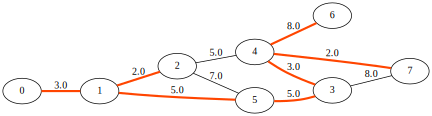

In [33]:
path = PRIM(G,5)
gs.nx2gv(G, weighted=True, path=path)

En Conclusion KRUSKAL Muestra el arbol de expansion minima para el conjunto de datos del grafo.
Mientras que PRIM regresa el arbol de expansion minimo para el conjunto de datos dado un NODO de inicio.

en algunas ocaciones estos arboles pueden coincidir pero no necesariamente en todos ya que dependera mucho de los recorridos.

**GRAFICAMOS EL MTS CON 30 NODOS**

In [164]:
%%file 2.in
0 1 3
1 2 2
1 5 5
2 4 5
2 5 7
3 5 5
3 7 8
4 6 8
4 7 2 
4 3 3
7 9 5
4 9 5
3 8 5
8 10 3
9 10 5
9 11 5
10 12 4
8 12 3
10 13 2
11 14 3
12 14 7
12 10 4
11 15 3
12 16 4
13 14 5
15 17 3
16 18 5
16 19 2
14 19 5
18 20 3
17 21 2
20 22 3
19 23 4
21 23 1
21 24 3
23 25 4
22 26 3 
25 26 1
25 27 6
25 28 3
27 29 4
28 30 1



Overwriting 2.in


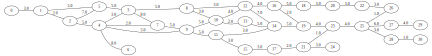

In [165]:
G1 = nx.read_weighted_edgelist('2.in', nodetype=int)
gs.nx2gv(G1, weighted=True)

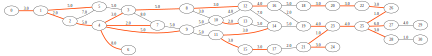

In [166]:
path = KRUSKAL(G1)
gs.nx2gv(G1, weighted=True, path=path)


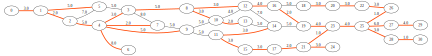

In [163]:
path = PRIM(G1,0)
gs.nx2gv(G1, weighted=True, path=path)

In [168]:
%timeit PRIM(G1,0)

1000 loops, best of 5: 353 µs per loop


In [169]:
%timeit KRUSKAL(G1)

10000 loops, best of 5: 184 µs per loop


Como se muestra ene stos casos o para este caso en particular el algoritmo de KRUSKAL e smas optimo que el algoritmo de prim.